### Issue 1: Lack of Data Preprocessing and Exploration

The notebook directly loads the dataset and displays the first few rows without any preprocessing or exploratory data analysis (EDA). This is a critical issue because understanding and preparing the data are essential steps before applying any machine learning model.  
Without preprocessing and EDA, the models may perform poorly due to issues like missing values, outliers, or unbalanced classes.  

**Suggested Change:**  
    1. Handling missing values through imputation or removal.  
    2. Detecting and addressing outliers that could skew the analysis. Droping m_dep and n_cores since this two also have lower co-relation value.  

In [ ]:
# Example code for handling missing values
data = data.dropna()  # Remove rows with missing values
# or
data = data.fillna(data.mean())  # Fill missing values with mean


### Issue 2: Feature Selection
The notebook performs a correlation analysis between the features and the target variable (price_range). However, it does not explicitly select or remove features based on this analysis.  
Feature Scaling: The code does not indicate whether feature scaling (normalization or standardization) was performed. Features with different scales can cause issues for certain models, as they may assign higher weights to features with larger values. Scaling ensures all features contribute equally to the model.  
Feature Selection: All features are used for training the models without any feature selection process. This can lead to the inclusion of irrelevant or redundant features, which can introduce noise and negatively impact model performance. Techniques like correlation analysis, recursive feature elimination, or feature importance should be used to select the most relevant features.  

**Suggested Change:**  
Removing irrelevant or redundant features can improve model performance and reduce overfitting. Droping m_dep and n_cores since this two also have lower co-relation value.  

In [ ]:
data = data.drop(columns=['clock_speed','mobile_wt','touch_screen', 'm_dep', 'n_cores'])

### Issue 3: Train-Test Split Ratio:
The current code splits the data into 75% for training and 25% for testing. While this split ratio is commonly used, it may not be optimal for this particular dataset.

**Suggested Change:**  
A more typical split ratio is 80% for training and 20% for testing, or even a 90/10 split, which would provide more data for training the model.
Suggested change:

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_ex1_array, y_ex1_array, test_size=0.2, random_state=42)


### Issue 4: Potential Suboptimal Neural Network Architecture
**Problem:** The provided code defines a neural network architecture with four hidden layers and a specific number of neurons in each layer. However, there is no clear justification or explanation for choosing this particular architecture. The number of hidden layers and neurons can significantly impact the model's performance, and an inappropriate architecture can lead to underfitting or overfitting.

**Suggested Change:** Instead of manually defining the neural network architecture, it is recommended to perform a systematic hyperparameter tuning process to find the optimal architecture for the given problem and dataset. This can be achieved through techniques like grid search, random search, or Bayesian optimization, which explore different combinations of hyperparameters, including the number of hidden layers and the number of neurons in each layer.

In [ ]:

mlp = MLPClassifier(
    solver='sgd',
    activation='relu',  # Using ReLU activation function
    random_state=42,
    hidden_layer_sizes=(64, 32, 16, 8),  # Increasing the number of hidden layers and neurons
    learning_rate_init=0.001,
    learning_rate='constant',
    max_iter=1,
)


### Issue 5: Model Selection and Hyperparameter Tuning
Model Complexity: The choice of models and their complexity is not discussed. Simple models might underfit, while overly complex models might overfit.  
Hyperparameter Tuning: There is no evidence of hyperparameter tuning. Default parameters might not be optimal for the dataset.  

**Suggested Change**  
Try Different Models: Experiment with various models like Random Forest, Gradient Boosting, or Support Vector Machines.  
Hyperparameter Tuning: Use Grid Search or Random Search to find the best hyperparameters for each model.  

In [ ]:
dt_params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
tree = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(tree, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

**After the changes the result is this, the accuracy is now 85%**

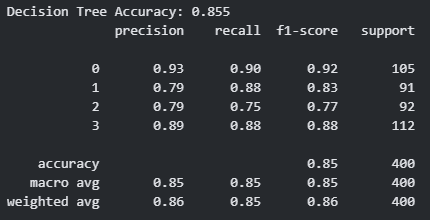

In [1]:
from IPython.display import Image

Image(filename='result.PNG')

In [ ]:
nn_params = {
    'hidden_layer_sizes': [(50, 50), (100, 100), (50, 100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}
nn = MLPClassifier(max_iter=500, random_state=42)
nn_grid = GridSearchCV(nn, nn_params, cv=5, scoring='accuracy')
nn_grid.fit(X_train, y_train)
nn_best = nn_grid.best_estimator_

Evaluation Metrics:
Imbalanced Classes: The target variable price_range has four classes. If these classes are imbalanced (i.e., some classes have significantly more instances than others), accuracy alone may not be a reliable metric. Other metrics like precision, recall, and F1-score should be considered, especially for imbalanced datasets.
Cross-Validation:
Validation Strategy: The notebook does not mention using cross-validation techniques. A single train-test split may not provide a reliable estimate of model performance, as the results can be heavily influenced by the specific data split. K-fold cross-validation or other resampling techniques should be used to obtain a more robust estimate of model performance.